# Análisis por categoría y subcategoría📶

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None) # Mostrar todas las columnas
pd.set_option("display.max_rows", None) # Mostrar más filas
pd.set_option("display.width", None) # Evita saltos de lineas raros
pd.set_option("display.float_format", lambda x: f'{x:,.4f}') #Formato de número
pd.set_option("display.expand_frame_repr", False)

df_wide = pd.read_excel("../data/processed/dataset_maestro_wide.xlsx")
print(df_wide.head(10))


    AÑO  MES  AÑO_MES  CCDD   DEPARTAMENTO              PROVINCIA                               DISTRITO                              COMISARIA  CAPTACION_C_INTERNET  CAPTACION_C_OFERTA_DE_ESTUDIO  CAPTACION_C_OFERTA_DE_TRABAJO  CAPTACION_C_OTRO__ESPECIFICAR  CAPTACION_C_PADRINAZGO  CAPTACION_C_SEDUCCION  CAPTACION_C_TOTAL  DESTINO_DEL_HECHO_D_COMISARIA  DESTINO_DEL_HECHO_D_DESISTIMIENTO  DESTINO_DEL_HECHO_D_FISCALIA  DESTINO_DEL_HECHO_D_JUEZ  DESTINO_DEL_HECHO_D_OTRAS_AUTORIDADES  DESTINO_DEL_HECHO_D_OTRO  DESTINO_DEL_HECHO_D_PENDIENTE_DE_INVESTIGACION  DESTINO_DEL_HECHO_D_TOTAL  EM_EF_TOTAL_EM_EF_TOTAL  EXPLOTACION_F2_ACTIVIDAD_AGROPECUARIA  EXPLOTACION_F2_ACTIVIDAD_PESQUERA  EXPLOTACION_F2_ALBAÑILERIA  EXPLOTACION_F2_CENTRO_DE_MASAJES  EXPLOTACION_F2_CENTRO_DE_PRODUCCION_DE_PORNOGRAFIA  EXPLOTACION_F2_DISCOTECA  EXPLOTACION_F2_ESTIBADORES  EXPLOTACION_F2_ESTUDIO_DE_MODELAJE  EXPLOTACION_F2_FABRICA_ARTESANAL_DE_LADRILOS  EXPLOTACION_F2_MENDICIDAD__VIA_PUBLICA  EXPLOTACION_F2_MINERIA_

## 1. Captación🔍

In [3]:
#Cadena que representan subcategorías de CAPTACIÓN
sub_cap_cols = [
    col
    for col in df_wide.columns
    if col.startswith("CAPTACION_C_") and "TOTAL" not in col
]
sub_cap = df_wide[sub_cap_cols].sum().sort_values(ascending=False)
print(f'Subcategorías de CAPTACIÓN:\n{sub_cap}')

Subcategorías de CAPTACIÓN:
CAPTACION_C_OFERTA_DE_TRABAJO    3485
CAPTACION_C_OTRO__ESPECIFICAR    1258
CAPTACION_C_INTERNET              221
CAPTACION_C_OFERTA_DE_ESTUDIO      79
CAPTACION_C_SEDUCCION              75
CAPTACION_C_PADRINAZGO             24
dtype: int64


### 1.1. Limpieza del nombres🧹

In [4]:
#Cambiamos los nombres del index
sub_cap.index = sub_cap.index.str.replace("__", " ")
sub_cap.index = sub_cap.index.str.replace("CAPTACION_C_", "").str.replace("_", " ").str.title()
print(sub_cap.index)

Index(['Oferta De Trabajo', 'Otro Especificar', 'Internet',
       'Oferta De Estudio', 'Seduccion', 'Padrinazgo'],
      dtype='object')


In [5]:
#Agregamos tilde
sub_cap = sub_cap.rename(index = {"Seduccion" : "Seducción"})
sub_cap = sub_cap.rename(index = {"Otro Especificar" : "Otro"})
print(sub_cap)

Oferta De Trabajo    3485
Otro                 1258
Internet              221
Oferta De Estudio      79
Seducción              75
Padrinazgo             24
dtype: int64


### 1.2. Gráfica de las subcategorías de captación para el periodo de Enero del 2027 a Diciembre del 2025

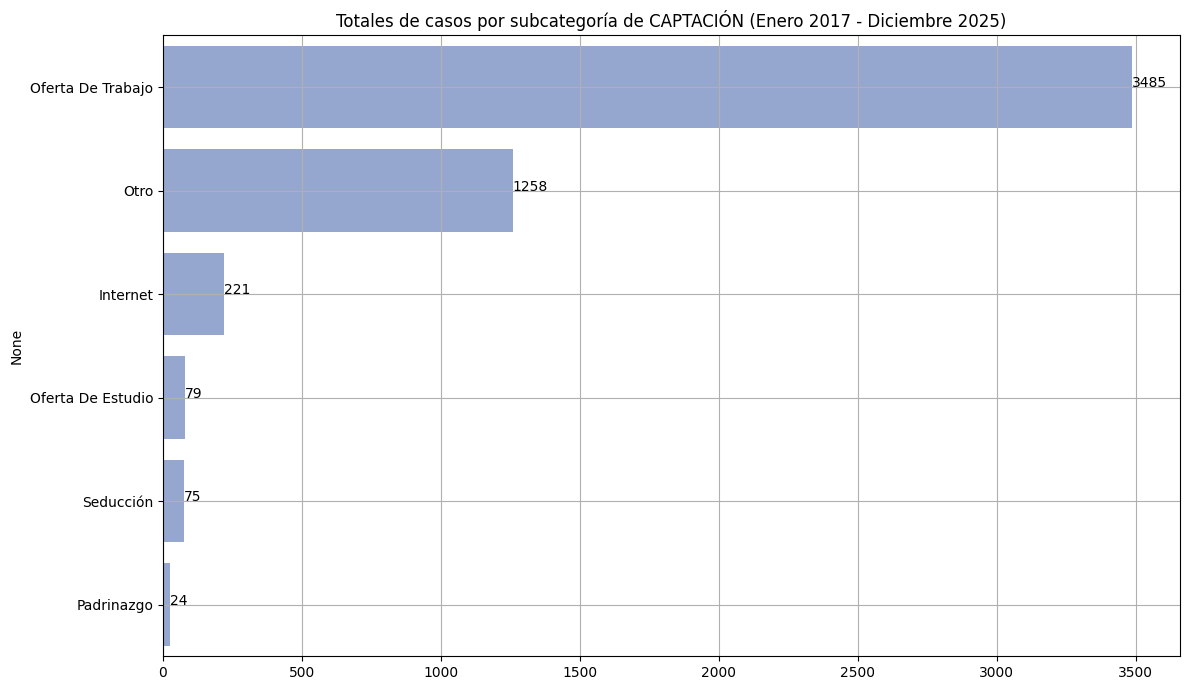

In [6]:
#Graficamos
plt.figure(figsize=(12, 7))
sns.barplot(x = sub_cap.values, y =sub_cap.index, color = "#8ca3d9")
for i, v in enumerate(sub_cap.values):
    plt.text(v, i, str(int(v)))

plt.title("Totales de casos por subcategoría de CAPTACIÓN (Enero 2017 - Diciembre 2025)")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/imagenes/Subcategoría_captación.png")
plt.show()

## 2. Destino del hecho 🚓

In [7]:
sub_dest_cols = [
    col 
    for col in  df_wide.columns
    if col.startswith("DESTINO_DEL_HECHO_D_") and "TOTAL" not in col
]

sub_dest = df_wide[sub_dest_cols].sum().sort_values(ascending = False)
print(f'Subcategoría DESTINO DEL HECHO:\n{sub_dest}') 

Subcategoría DESTINO DEL HECHO:
DESTINO_DEL_HECHO_D_FISCALIA                      2649
DESTINO_DEL_HECHO_D_PENDIENTE_DE_INVESTIGACION     550
DESTINO_DEL_HECHO_D_OTRAS_AUTORIDADES              233
DESTINO_DEL_HECHO_D_OTRO                           221
DESTINO_DEL_HECHO_D_COMISARIA                      188
DESTINO_DEL_HECHO_D_JUEZ                            85
DESTINO_DEL_HECHO_D_DESISTIMIENTO                    2
dtype: int64


### 2.1. Limpieza de nombres🧹

In [8]:
sub_dest.index = sub_dest.index.str.replace("DESTINO_DEL_HECHO_D_", "").str.title().str.replace("_", " ")
sub_dest= sub_dest.rename(index = {"Fiscalia": "Fiscalía", "Pendiente De Investigacion" : "Pendiente De Investigación", "Comisaria" : "Comisaría"})
print(sub_dest)

Fiscalía                      2649
Pendiente De Investigación     550
Otras Autoridades              233
Otro                           221
Comisaría                      188
Juez                            85
Desistimiento                    2
dtype: int64


## 2.2. Gráfica de las subcategorías de DESTINO DEL HECHO desde Enero del 2017 hasta Septiembre del 2025📈

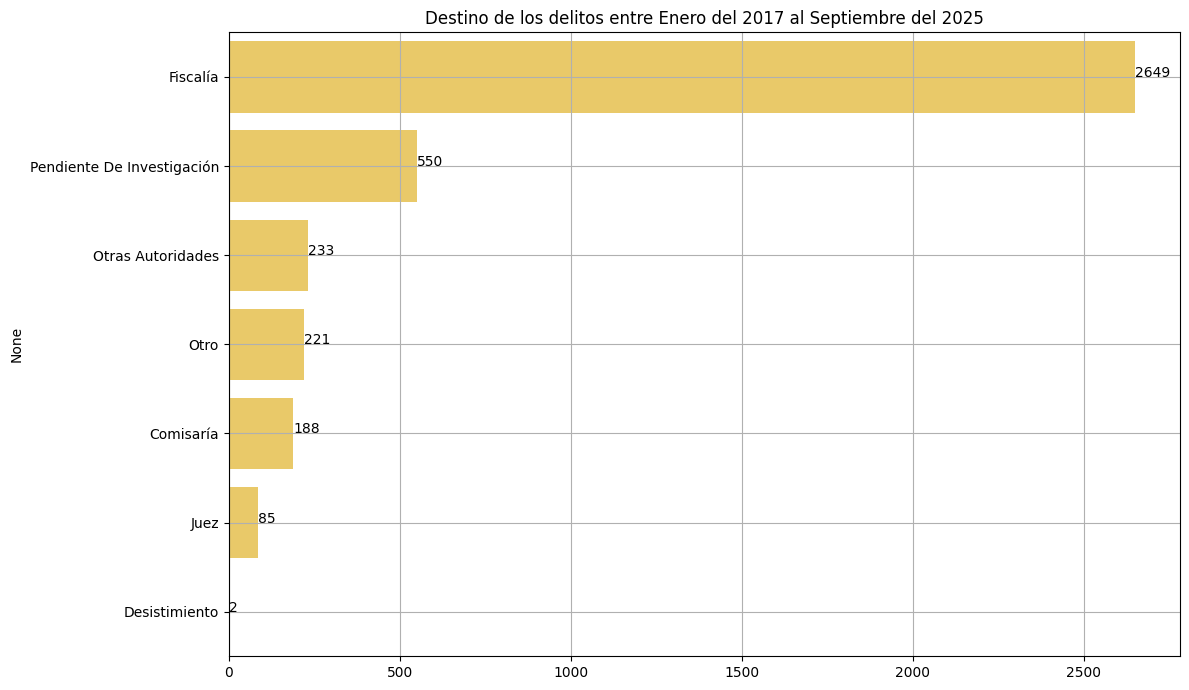

In [9]:
plt.figure(figsize=(12, 7))
sns.barplot(x = sub_dest.values, y=sub_dest.index, color = "#ffd453")
for i, v in enumerate(sub_dest.values):
    plt.text(v, i, str(int(v)))

plt.title("Destino de los delitos entre Enero del 2017 al Septiembre del 2025")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/imagenes/Subcategoría_Destino_del_hecho.png")
plt.show()

## 3. Género femenino por grupo de edades🙍‍♀️

In [17]:
sub_fem_cols = [
    col 
    for col in df_wide.columns
    if col.startswith("FEMENINO_GRUPO_EDAD_EF_DE_") and "SUB_TOTAL" not in col
]
sub_fem = df_wide[sub_fem_cols].sum().sort_values(ascending=False)
print(f"Mujeres víctimas de el delito de trata de personas entre Enero del 2017 y Septiembre del 2025:\n{sub_fem}")

Mujeres víctimas de el delito de trata de personas entre Enero del 2017 y Septiembre del 2025:
FEMENINO_GRUPO_EDAD_EF_DE_18_A_29_AÑOS    2183
FEMENINO_GRUPO_EDAD_EF_DE_12_A_17_AÑOS    1218
FEMENINO_GRUPO_EDAD_EF_DE_30_A_59_AÑOS     368
FEMENINO_GRUPO_EDAD_EF_DE_6_A_11_AÑOS       93
FEMENINO_GRUPO_EDAD_EF_DE_0_A_5_AÑOS        32
FEMENINO_GRUPO_EDAD_EF_DE_60_A_MAS           4
dtype: int64


### 3.1. Limpieza de los nombres🧹

In [18]:
sub_fem.index = sub_fem.index.str.replace("FEMENINO_GRUPO_EDAD_EF_DE_", "").str.replace("_", " ").str.upper()
sub_fem = sub_fem.rename(index = {"60 A MAS" : "60 A MÁS"})
print(f"Columnas renombradas:\n{sub_fem}")

Columnas renombradas:
18 A 29 AÑOS    2183
12 A 17 AÑOS    1218
30 A 59 AÑOS     368
6 A 11 AÑOS       93
0 A 5 AÑOS        32
60 A MÁS           4
dtype: int64


### 3.1. Graficamos la cantidad de mujeres víctimas del delito de trata de personas por grupos de edad📈

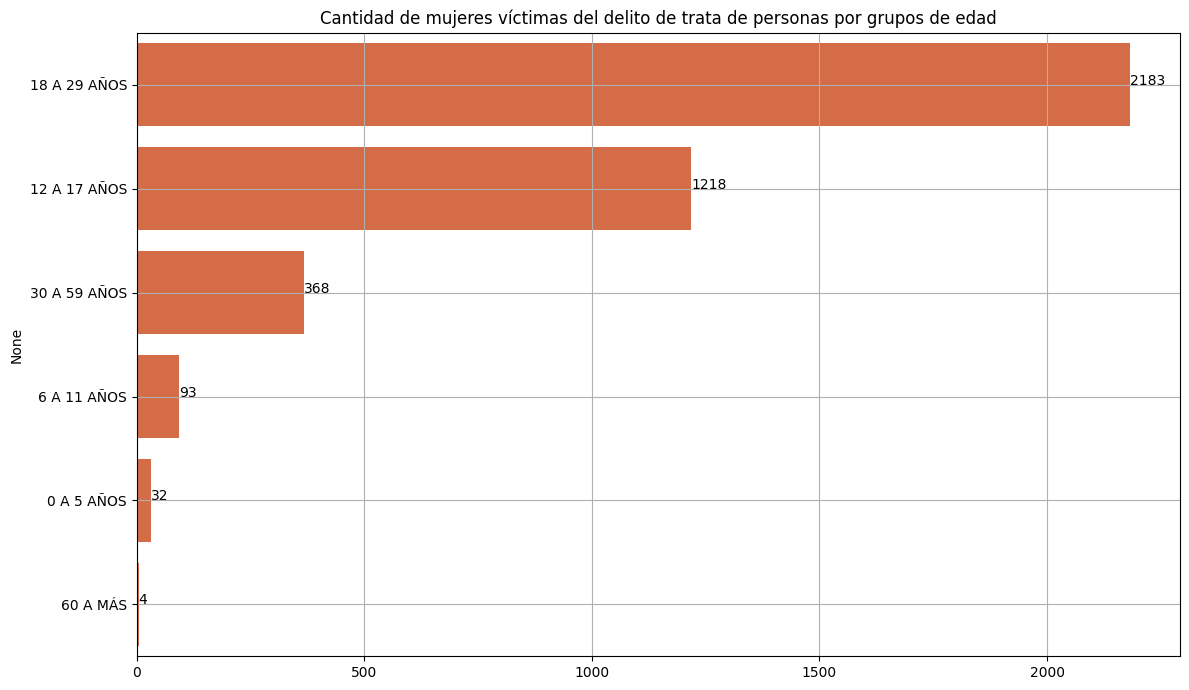

In [20]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_fem.values, y=sub_fem.index, color = "#eb612f")
for i, v in enumerate(sub_fem.values):
    plt.text(v, i, str(int(v)))

plt.title("Cantidad de mujeres víctimas del delito de trata de personas por grupos de edad")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/imagenes/Mujeres_víctimas_trata_personas.png")
plt.show()

### 4. Género masculino por grupo de edades🙍‍♂️

In [24]:
sub_masc_cols = [
    col
    for col in df_wide.columns
    if col.startswith("MASCULINO_GRUPO_DE_EDAD_EM_DE_") and "SUB_TOTAL" not in col
]
sub_masc = df_wide[sub_masc_cols].sum().sort_values(ascending=False)
print(f"Hombres víctimas del delito de trata de personas entre Enero del 2017 y Septiembre del 2025:\n{sub_masc}")

Hombres víctimas del delito de trata de personas entre Enero del 2017 y Septiembre del 2025:
MASCULINO_GRUPO_DE_EDAD_EM_DE_18_A_29_AÑOS    201
MASCULINO_GRUPO_DE_EDAD_EM_DE_12_A_17_AÑOS    159
MASCULINO_GRUPO_DE_EDAD_EM_DE_30_A_59_AÑOS     90
MASCULINO_GRUPO_DE_EDAD_EM_DE_6_A_11_AÑOS      40
MASCULINO_GRUPO_DE_EDAD_EM_DE_0_A_5_AÑOS       25
MASCULINO_GRUPO_DE_EDAD_EM_DE_60_A_MAS          4
dtype: int64


### 4.1. Limpieza en los nombres🧹

In [33]:
sub_masc.index = sub_masc.index.str.replace("MASCULINO_GRUPO_DE_EDAD_EM_DE_", "").str.replace("_", " ").str.replace("60 A MAS", "60 A MÁS")
print(f"Hombres víctimas del delito de trata de personas entre Enero del 2017 y Septiembre del 2025:{sub_masc}") 

Hombres víctimas del delito de trata de personas entre Enero del 2017 y Septiembre del 2025:18 A 29 AÑOS    201
12 A 17 AÑOS    159
30 A 59 AÑOS     90
6 A 11 AÑOS      40
0 A 5 AÑOS       25
60 A MÁS          4
dtype: int64


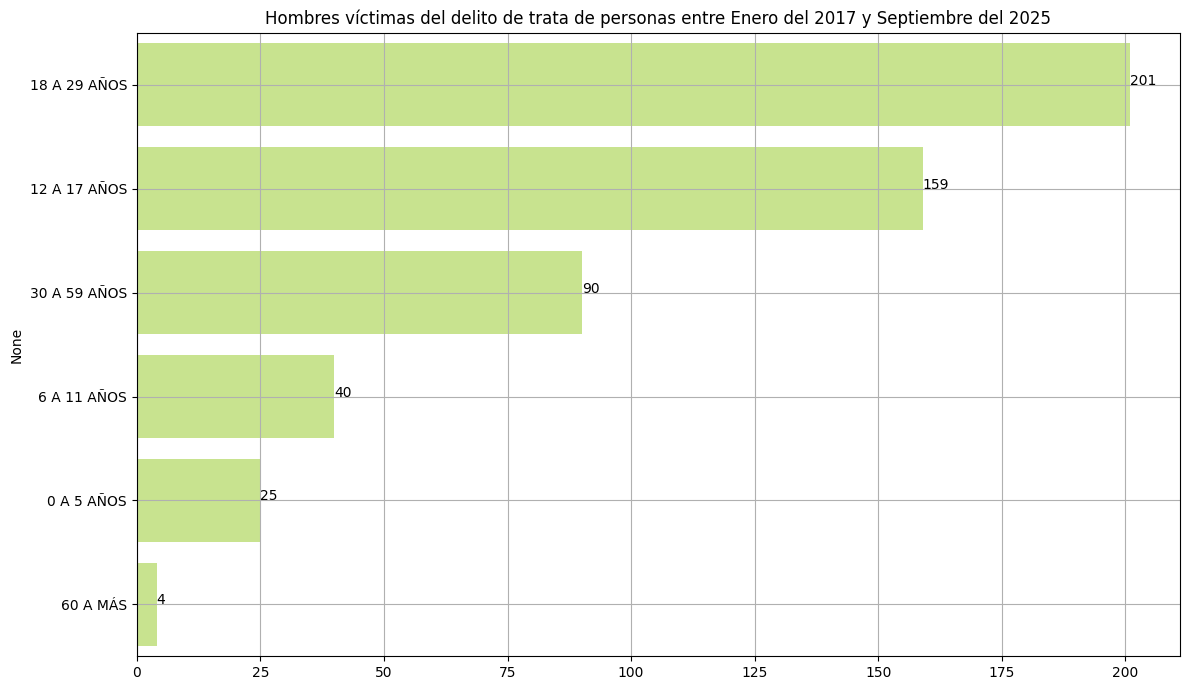

In [34]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_masc.values, y=sub_masc.index, color = "#cdf181")
for i, v in enumerate(sub_masc.values):
    plt.text(v, i, str(int(v)))

plt.title("Hombres víctimas del delito de trata de personas entre Enero del 2017 y Septiembre del 2025")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/imagenes/Hombres_víctimas_del_delito_trata_personas.png")
plt.show()

## 5. Finalidad del tipo de delito🔍

In [30]:
sub_final_cols = [
    col 
    for col in df_wide.columns
    if col.startswith("FINALIDAD_DEL_TIPO_DE_DELITO_F1_") and "TOTAL" not in col
]
sub_final = df_wide[sub_final_cols].sum().sort_values(ascending=False)
print(f'Finalidad del tipo de delito entre Enero del 2017 y Septiembre del 2025:\n{sub_final}')

Finalidad del tipo de delito entre Enero del 2017 y Septiembre del 2025:
FINALIDAD_DEL_TIPO_DE_DELITO_F1_EXPLOTACION_SEXUAL                  2877
FINALIDAD_DEL_TIPO_DE_DELITO_F1_EXPLOTACION_LABORAL                 1054
FINALIDAD_DEL_TIPO_DE_DELITO_F1_NO_IDENTIFICADO                      962
FINALIDAD_DEL_TIPO_DE_DELITO_F1_TRABAJOS_Y_SERVICIOS_FORZADOS        108
FINALIDAD_DEL_TIPO_DE_DELITO_F1_MENDICIDAD                           100
FINALIDAD_DEL_TIPO_DE_DELITO_F1_VENTA_DE_NIÑOS                        36
FINALIDAD_DEL_TIPO_DE_DELITO_F1_TRAFICO_DE_ORGANOS_TEJIDO_HUMANO       5
dtype: int64


### 5.1. Limpieza de nombres🧹

In [32]:
sub_final.index = sub_final.index.str.replace("FINALIDAD_DEL_TIPO_DE_DELITO_F1_", "").str.replace("_", " ")
sub_final = sub_final.rename(index={"EXPLOTACION SEXUAL" : "EXPLOTACIÓN SEXUAL", "EXPLOTACION LABORAL" : "EXPLOTACIÓN LABORAL", "TRAFICO DE ORGANOS TEJIDO HUMANO" : "TRÁFICO DE ÓRGANOS TEJIDO HUMANO"})
sub_final.index = sub_final.index.str.capitalize()
print(sub_final)

Explotación sexual                  2877
Explotación laboral                 1054
No identificado                      962
Trabajos y servicios forzados        108
Mendicidad                           100
Venta de niños                        36
Tráfico de órganos tejido humano       5
dtype: int64


## 5.2. Grafícamos cual ha sido el tipo de delito que se clasifican como trata de personas que más se ha cometido entre Enero del 2027 y Septiembre del 2025 📶

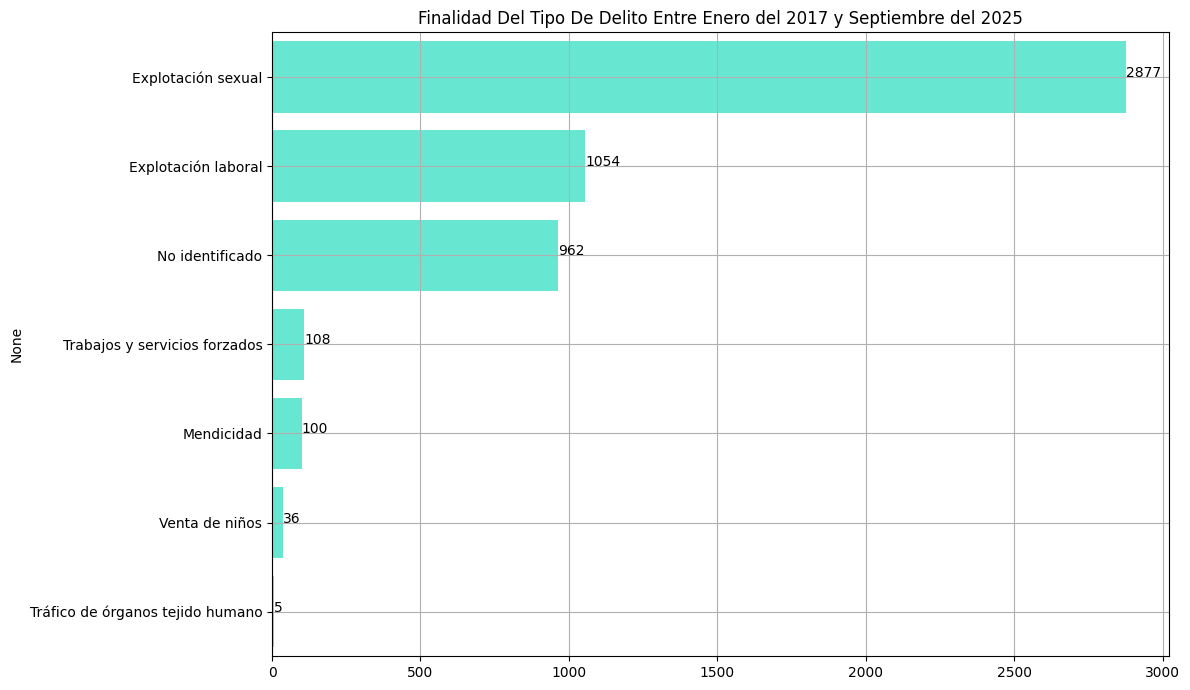

In [35]:
plt.figure(figsize= (12, 7))
sns.barplot(x=sub_final.values, y=sub_final.index, color = "#52fbdf")
for i, v in enumerate(sub_final.values):
    plt.text(v, i, str(int(v)))

plt.title("Finalidad Del Tipo De Delito Entre Enero del 2017 y Septiembre del 2025")
plt.grid(True)
plt.tight_layout()
plt.savefig("../reports/imagenes/Finalidad_tipo_delíto.png")
plt.show()

## 6. Medio empleado por el tratante🔍

In [40]:
sub_medio_cols = [
    col
    for col in df_wide.columns
    if col.startswith("MEDIO_EMPLEADO_POR_EL_TRATANTE_M_") and "TOTAL" not in col
]
sub_medio = df_wide[sub_medio_cols].sum().sort_values(ascending=False)
print(f"Medio empleado por el tratante para cometer el delito:\n{sub_medio}")

Medio empleado por el tratante para cometer el delito:
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_ENGAÑO                            3016
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_OTRO__ESPECIFICAR                 1050
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_CONCESION_O_RECEPCION_DE_PAGOS     436
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_AMENAZA                            338
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_PRIVACION_DE_LA_LIBERTAD           138
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_VIOLENCIA                           75
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_ABUSO_DE_PODER                      50
MEDIO_EMPLEADO_POR_EL_TRATANTE_M_FRAUDE                              39
dtype: int64


### 6.1. Limpieza de nombres🧹

In [41]:
sub_medio.index = sub_medio.index.str.replace("MEDIO_EMPLEADO_POR_EL_TRATANTE_M_", "").str.replace("__", " ").str.replace("_", " ")
sub_medio = sub_medio.rename(index={"PRIVACION DE LA LIBERTAD" : "PRIVACIÓN DE LA LIBERTAD", "CONCESION O RECEPCION DE PAGOS" : "CONCESIÓN O RECEPCION DE PAGOS", "OTRO ESPECIFICAR" : "OTRO"})
sub_medio.index = sub_medio.index.str.capitalize()
print(sub_medio)

Engaño                            3016
Otro                              1050
Concesión o recepcion de pagos     436
Amenaza                            338
Privación de la libertad           138
Violencia                           75
Abuso de poder                      50
Fraude                              39
dtype: int64


### 6.2. Graficamos la cantidad de casos por cada tipo de medio empleado por el tratante entre Enero del 2017 y Septimbre del 2025📈

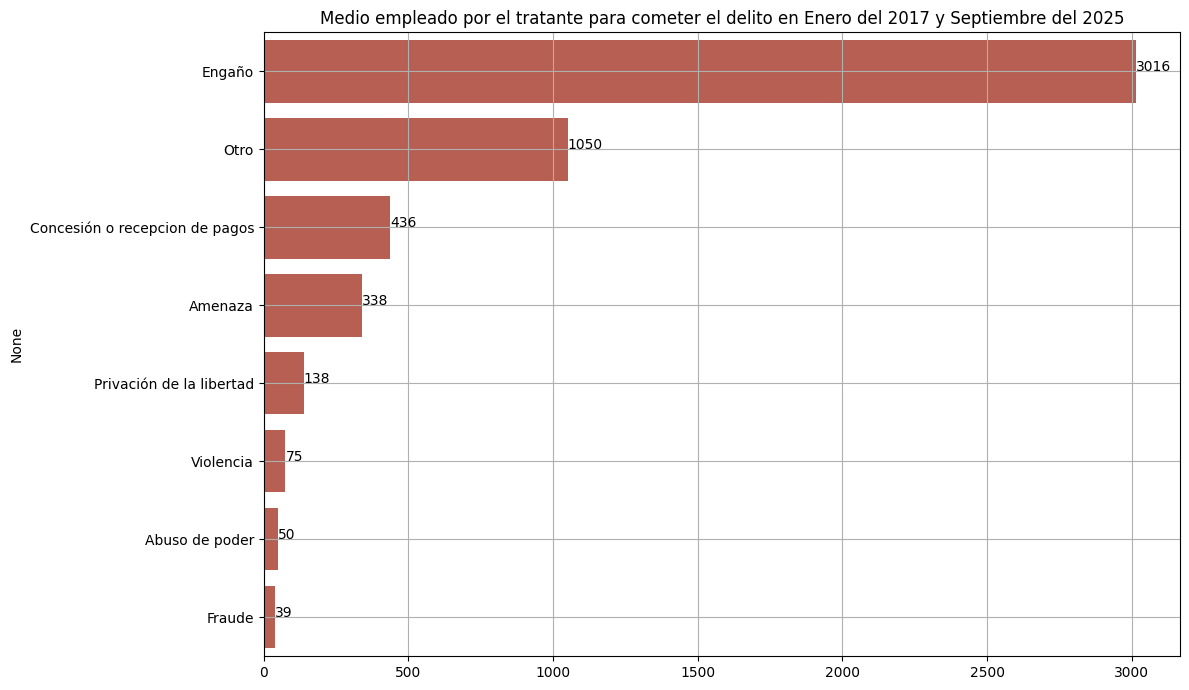

In [43]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_medio.values, y=sub_medio.index, color="#c75341")
for i, v in enumerate(sub_medio.values):
    plt.text(v, i, str(int(v)))

plt.title("Medio empleado por el tratante para cometer el delito en Enero del 2017 y Septiembre del 2025")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/imagenes/Medio_empleado_por_el_tratante.png")
plt.show()

## 7. Vínculo con el tratante 🔍

In [73]:
sub_vinc_trat_cols = [
    col
    for col in df_wide.columns
    if col.startswith("VINCULO_CON_EL_TRATANTE_P4_") and "TOTAL" not in col
]

sub_vinc_trat = df_wide[sub_vinc_trat_cols].sum().sort_values(ascending=False)
print(f"Vínculo que se tienen las víctimas con el tratante entre Enero del 2017 y Septiembre del 2025:\n{sub_vinc_trat}")

Vínculo que se tienen las víctimas con el tratante entre Enero del 2017 y Septiembre del 2025:
VINCULO_CON_EL_TRATANTE_P4_OTRO__ESPECIFICAR    4300
VINCULO_CON_EL_TRATANTE_P4_CONOCIDO              665
VINCULO_CON_EL_TRATANTE_P4_FAMILIAR              147
VINCULO_CON_EL_TRATANTE_P4_TUTOR                  19
VINCULO_CON_EL_TRATANTE_P4_CONYUGE                11
dtype: int64


### 7.1. Limpieza de nombres🧹

In [83]:
sub_vinc_trat.index = sub_vinc_trat.index.str.replace("VINCULO_CON_EL_TRATANTE_P4_", " ").str.replace("__", " ").str.replace("_", " ").str.strip().str.capitalize()
sub_vinc_trat = sub_vinc_trat.rename(index={"OTRO ESPECIFICAR": "OTRO"})
print(sub_vinc_trat.index)

Index(['Otro', 'Conocido', 'Familiar', 'Tutor', 'Conyuge'], dtype='object')


### 7.2. Graficamos todos los casos de vínculos de la víctima con el tratante📶

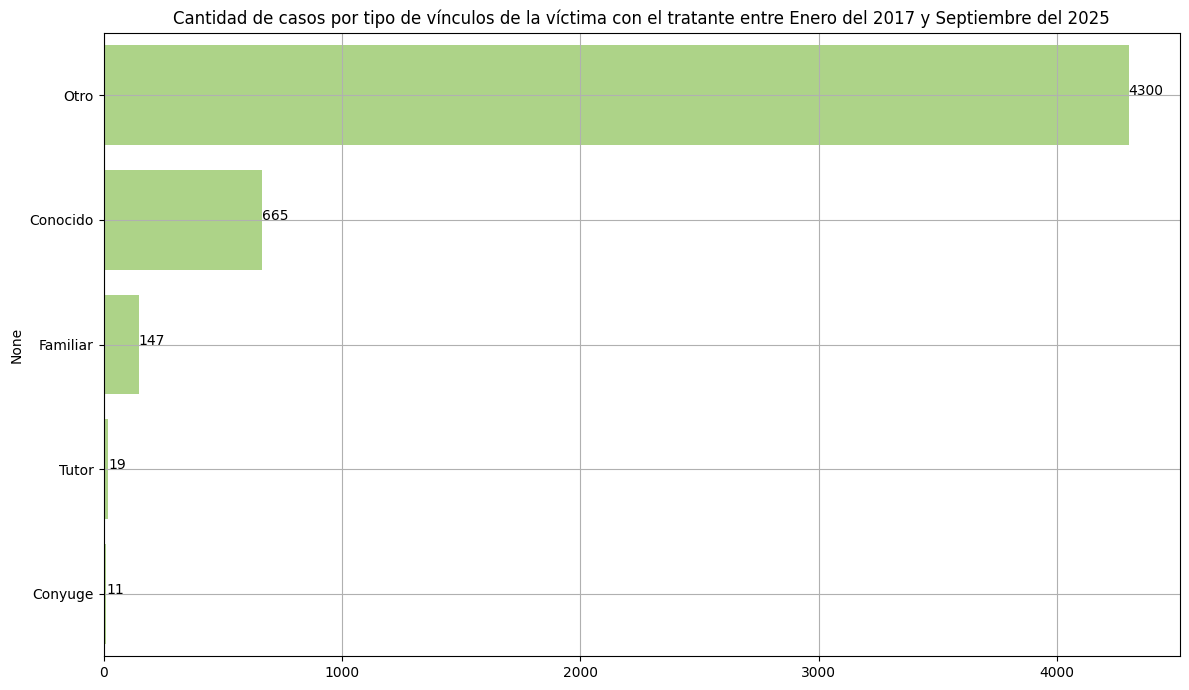

In [84]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sub_vinc_trat.values, y=sub_vinc_trat.index, color = "#addf7c")
for i, v in enumerate(sub_vinc_trat.values):
    plt.text(v, i, str(int(v)))

plt.title("Cantidad de casos por tipo de vínculos de la víctima con el tratante entre Enero del 2017 y Septiembre del 2025")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/imagenes/Vinculo_de_la_victima_con_el_tratante.png")
plt.show()

## 8. Tipo de reclutamiento🚌

In [44]:
sub_tip_recl_cols = [
    col
    for col in df_wide.columns
    if col.startswith("TIPO_RECLUTAMIENTO_T_") and "TOTAL" not in col
]
sub_tip_recl = df_wide[sub_tip_recl_cols].sum().sort_values(ascending=True)
print(f"Tipo de reclumiento de las víctimas del trata de personas entre Enero del 2017 y Septiembre del 2025:\n{sub_tip_recl}")

Tipo de reclumiento de las víctimas del trata de personas entre Enero del 2017 y Septiembre del 2025:
TIPO_RECLUTAMIENTO_T_INTERNACIONAL    1306
TIPO_RECLUTAMIENTO_T_NACIONAL         3759
dtype: int64


### 7.1. Limpieza de columnas🧹

In [47]:
sub_tip_recl.index = sub_tip_recl.index.str.replace("TIPO_RECLUTAMIENTO_T_", " ")
print(sub_tip_recl)

INTERNACIONAL    1306
NACIONAL         3759
dtype: int64


## 8.2. Graficamos el tipo de reclumiento de las víctimas del trata de personas entre Enero del 2017 y Septiembre del 2025📶

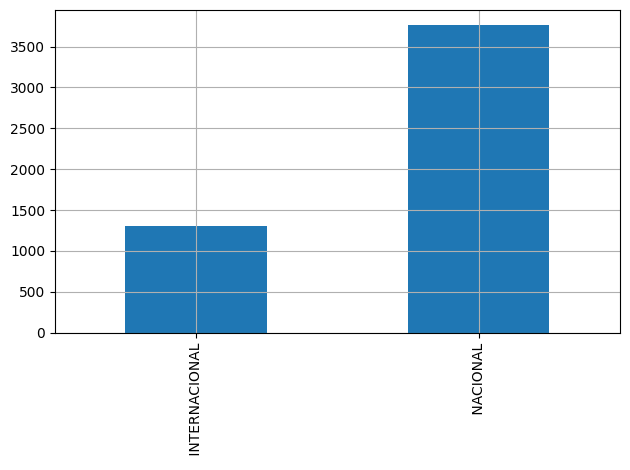

In [53]:
sub_tip_recl.plot(kind = "bar")
plt.grid()
plt.tight_layout()
plt.savefig("../reports/imagenes/Tipo_de_reclutamiento.png")
plt.show()